# Descrição do Problema
Um laboratório de análises clínicas, com base em dados de pacientes que realizaram exames de diabetes, gostaria de prever, com base em características como idade, peso e altura, qual o resultado esperado do exame para novos pacientes.
Para isso, iremos treinar um algoritmo supervisionado (dado que temos dados reais dos resultados) para criar um modelo preditivo que atenda à necessidade deste laboratório.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_exames = pd.read_csv('./datasets/diabetes.csv')

In [10]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [11]:
df_exames.head(5)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [12]:
df_exames.drop(columns=["id_paciente"], axis=1, inplace=True)

In [13]:
df_exames.head(5)

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100


In [14]:
# converter uma variável categórica (genero) em numérica, usando one-hot-encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype="int64")

In [15]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   idade      100 non-null    int64
 1   peso       100 non-null    int64
 2   altura     100 non-null    int64
 3   resultado  100 non-null    int64
 4   genero_F   100 non-null    int64
 5   genero_M   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


<Axes: >

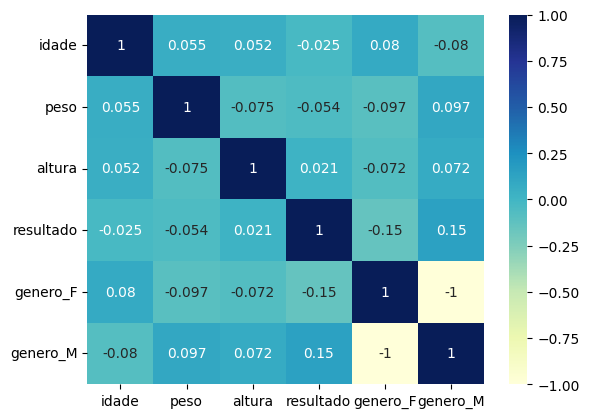

In [16]:
# Apresentar Mapa de Calor com correlação
sns.heatmap(df_exames.corr(), annot=True, cmap="YlGnBu")

<Axes: >

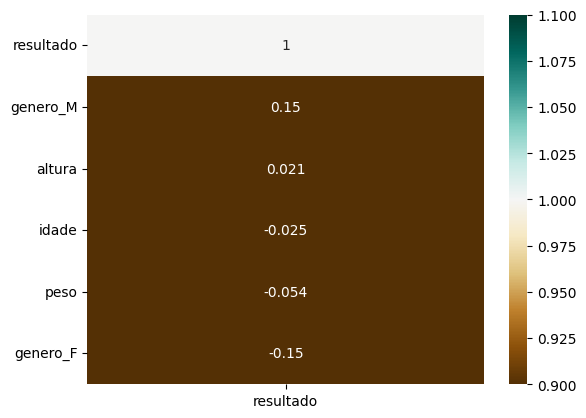

In [21]:
# Mapa de Correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by="resultado", ascending=False), vmin=1, vmax=1, annot=True,  cmap="BrBG")

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


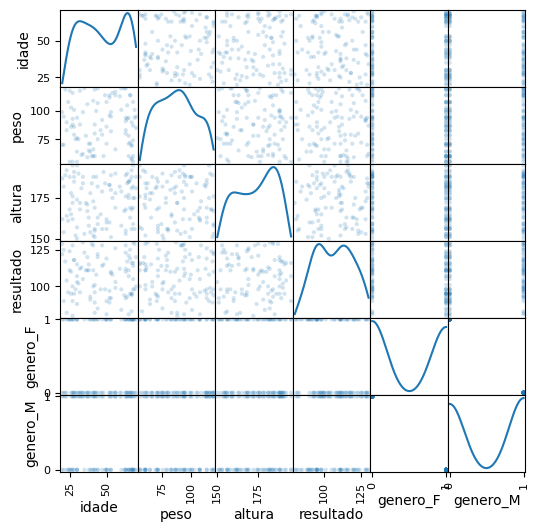

In [23]:
# Plot de Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

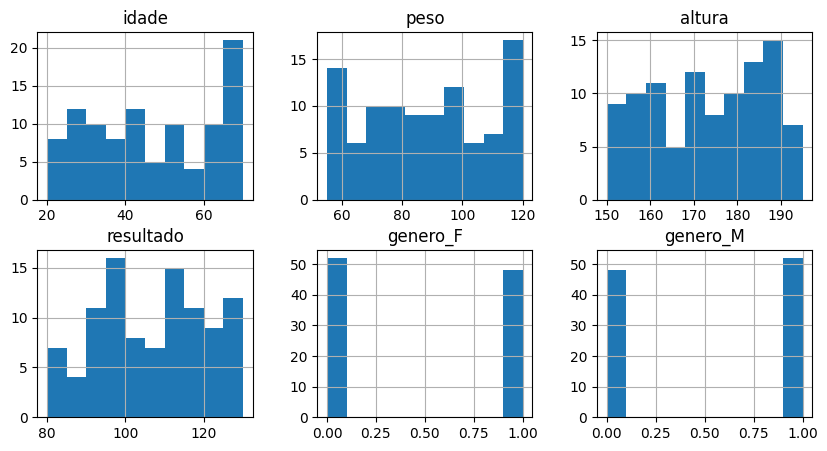

In [24]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,3), figsize=(10,5))

In [27]:
# Criar uma feature nova
# IMC (Índice de Massa Corporal) = peso / altura²
df_exames['imc'] = df_exames['peso'] / ((df_exames['altura']/100) ** 2)
df_exames

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
...,...,...,...,...,...,...,...
95,52,96,183,89,1,0,28.666129
96,68,108,169,105,1,0,37.813802
97,21,95,154,125,0,1,40.057345
98,41,109,173,128,0,1,36.419526


<Axes: >

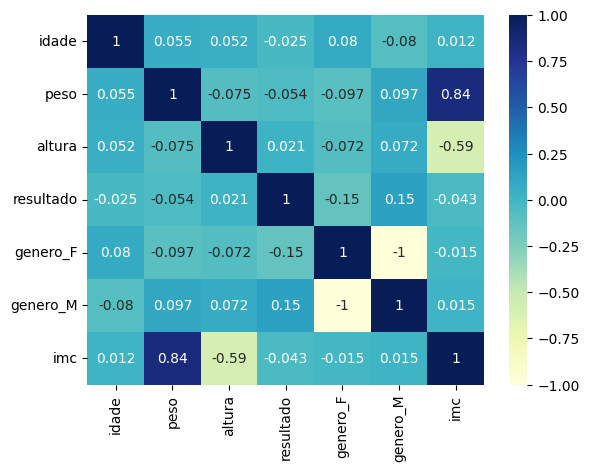

In [28]:
# Apresentar Mapa de Calor com correlação
sns.heatmap(df_exames.corr(), annot=True, cmap="YlGnBu")

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [34]:
# Modelo 1 - sem IMC
X = df_exames.drop(columns=['resultado', 'imc'])
y = df_exames['resultado']

In [37]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=51)

In [39]:
len(X_train), len(X_test), len(y_train), len(y_test)

(70, 30, 70, 30)

In [40]:
# Treinar o algoritmo de Regressão Linear - Modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [42]:
# Gerar predições para o conjunto de teste
y_pred = model_1.predict(X_test)
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [43]:
# Equação da Reta - Regressão Linear
# y = ax + b
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [44]:
model_1.intercept_

94.21133142019855

In [45]:
# R2 Score - Conjunto de treinamento
model_1.score(X_train,y_train)

0.06218388634297234

In [46]:
# R2 Score - Conjunto de teste
model_1.score(X_test,y_test)

-0.13640904479106375

Modelo tem um underfit

In [47]:
# R2 Score - Testes
r2_score(y_test, y_pred)

-0.13640904479106375

In [48]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, y_pred)

12.695569181179543

In [49]:
# Segundo Modelo - Apenas IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=51)


In [50]:
# Treinar o algoritmo de Regressão Linear - Modelo 2
model_2 = LinearRegression().fit(X_train, y_train)

In [52]:
# Gerar predições para o conjunto de teste
y_pred = model_2.predict(X_test)
y_pred

array([102.73796795, 107.63459815, 108.58489716, 105.70201829,
       103.49767627, 108.73954738, 106.19637687, 108.30118863,
       107.77627304, 106.26623629, 108.10220438, 108.18040704,
       107.64653815, 104.90037915, 101.0377542 , 105.66044363,
       104.93184853, 109.01470939, 105.54141413, 103.46672578,
       105.42716889, 108.77686903, 107.65316149, 104.46837648,
       105.02409479, 105.70201829, 102.84895739, 108.11389027,
       107.77143433, 103.72326007])

In [53]:
model_2.coef_

array([-0.21677589])

In [54]:
model_2.intercept_

112.15019229088837

In [56]:
# R2 Score - Conjunto de treinamento
model_2.score(X_train,y_train)

0.01528596266480664

In [58]:
# R2 Score - Conjunto de teste
model_2.score(X_test,y_test)

-0.08898328562401758

Under fit

In [59]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, y_pred)

12.5056514070601

In [62]:
model_2.predict([[30]])

/Users/abilioazevedo/.local/share/virtualenvs/statistic_dev-k82UT3Rq/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([105.64691571])

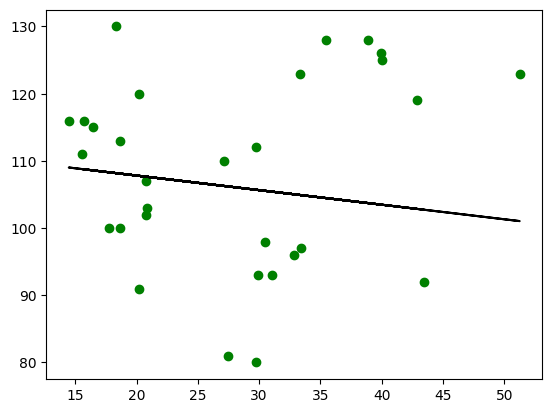

In [64]:
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color="g")
plt.plot(X_test, y_pred, color="k")